**Question 1:** What is a Convolutional Neural Network (CNN), and how does it differ from traditional fully connected neural networks in terms of architecture and performance on image data?

  - Convolutional Neural Network (CNN) is a type of deep learning model specially designed to work with image data. It automatically learns important features like edges, shapes, and textures from images using convolution filters.

**Difference between CNN and Fully Connected Neural Networks (FCNN)**
  | Aspect                | CNN                                      | Fully Connected NN                           |
| --------------------- | ---------------------------------------- | -------------------------------------------- |
| Architecture          | Uses **convolution + pooling layers**    | Uses only **dense (fully connected) layers** |
| Feature learning      | **Automatic feature extraction**         | Manual feature extraction needed             |
| Parameters            | **Fewer parameters** (weight sharing)    | **Large number of parameters**               |
| Spatial info          | Preserves **spatial structure** of image | Loses spatial information                    |
| Performance on images | **High accuracy, efficient**             | Poor performance on images                   |
| Overfitting           | Less (due to fewer parameters)           | More likely                                  |
  
---

**Question 2:** Discuss the architecture of LeNet-5 and explain how it laid the foundation for modern deep learning models in computer vision. Include references to its original research paper.

  - LeNet-5 is one of the earliest Convolutional Neural Networks (CNNs), proposed by Yann LeCun et al. (1998) for handwritten digit recognition (MNIST). It laid the foundation for modern deep learning models in computer vision.

  **Architecture of LeNet-5**

1. **Input Layer**

 - 32 × 32 grayscale image

2. **C1 – Convolution Layer**

 - 6 feature maps, 5×5 kernels

 - Extracts basic features like edges

3. **S2 – Subsampling (Pooling) Layer**

 - Average pooling

 - Reduces spatial size and computation

4. **C3 – Convolution Layer**

- 16 feature maps

 - Learns more complex patterns

5. **S4 – Subsampling Layer**

 - Further downsampling

6. **C5 – Convolution Layer**

 - 120 feature maps

 - Acts like a fully connected layer

7. **F6 – Fully Connected Layer**

- 84 neurons

8. **Output Layer**

 - 10 neurons (digits 0–9)

**How LeNet-5 Laid the Foundation for Modern CNNs**

 - Introduced convolution + pooling as core building blocks

 - Showed the power of local receptive fields and weight sharing

 - Reduced parameters compared to fully connected networks

 - Inspired modern architectures like AlexNet, VGG, ResNet

 **Original Research Paper (Reference)**

LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P.

**“Gradient-Based Learning Applied to Document Recognition”**

*Proceedings of the IEEE, 1998.*

---

**Question 3:**  Compare and contrast AlexNet and VGGNet in terms of design principles, number of parameters, and performance. Highlight key innovations and limitations of each.

 - **Design Principles**
  | Aspect           | **AlexNet (2012)**                   | **VGGNet (2014)**                       |
| ---------------- | ------------------------------------ | --------------------------------------- |
| Core idea        | **Deeper than LeNet**, large filters | **Very deep but simple**, small filters |
| Conv filter size | Large (11×11, 5×5)                   | Small (3×3 only)                        |
| Depth            | 8 layers (5 conv + 3 FC)             | 16 or 19 layers                         |
| Activation       | ReLU (key innovation)                | ReLU                                    |
| Pooling          | Max pooling                          | Max pooling                             |

 - **Number of Parameters**
| Model   | Parameters   |
| ------- | ------------ |
| AlexNet | ~60 million  |
| VGGNet  | ~138 million |

 - **Performance**
 | Aspect            | AlexNet                | VGGNet                                        |
| ----------------- | ---------------------- | --------------------------------------------- |
| ImageNet accuracy | Very high for its time | Higher than AlexNet                           |
| Feature quality   | Good                   | Excellent (used widely for transfer learning) |
| Training cost     | Moderate               | Very high (memory + compute heavy)            |

**# Key Innovations**

**AlexNet**

 - Introduced ReLU for faster training

 - Used GPU-based training

 - Applied dropout to reduce overfitting

**VGGNet**

 - Showed that depth improves performance

 - Used uniform 3×3 convolutions

 - Simple and consistent architecture

**# Limitations**

**AlexNet**

 - Large filters → less efficient

 - Shallower compared to later models

**VGGNet**

 - Extremely memory intensive

 - Slow training and inference

 - Not parameter-efficient

 ---

**Question 4:**  What is transfer learning in the context of image classification? Explain how it helps in reducing computational costs and improving model performance with limited data.

 - **Transfer Learning in Image Classification**

Transfer learning is a deep learning approach where a pre-trained convolutional neural network (CNN) (trained on a large dataset like ImageNet) is reused for a new image classification task.

 - **How It Reduces Computational Cost**

1. No need to train the entire network from scratch

2. Early layers are frozen, so fewer parameters are trained

3. Requires less training time and lower GPU/CPU resources

 - **How It Improves Performance with Limited Data**

1. Pre-trained models already learn general visual features (edges, textures, shapes)

2. Reduces overfitting on small datasets

3. Provides higher accuracy compared to training from scratch
---


**Question 5:** Describe the role of residual connections in ResNet architecture. How do they address the vanishing gradient problem in deep CNNs?

 - Residual connections in ResNet connect the input of a layer directly to the output of deeper layers using skip connections. Instead of learning a complete transformation, the network learns a residual function, which makes optimization easier. These connections allow gradients to flow directly during backpropagation, reducing the vanishing gradient problem. As a result, ResNet can successfully train very deep convolutional neural networks and achieve better performance and faster convergence compared to plain CNNs.
 ---

**Question 6:**  Implement the LeNet-5 architectures using Tensorflow or PyTorch to classify the MNIST dataset. Report the accuracy and training time.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time

# Load MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Reshape to (samples, 28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

# Pad images to 32x32 (LeNet-5 requirement)
x_train = tf.pad(x_train, [[0,0],[2,2],[2,2],[0,0]])
x_test  = tf.pad(x_test,  [[0,0],[2,2],[2,2],[0,0]])

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)

# LeNet-5 Model
model = models.Sequential([
    layers.Conv2D(6, kernel_size=5, activation='tanh', input_shape=(32,32,1)),
    layers.AveragePooling2D(pool_size=2),
    layers.Conv2D(16, kernel_size=5, activation='tanh'),
    layers.AveragePooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
start_time = time.time()
model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)
training_time = time.time() - start_time

# Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Test Accuracy:", test_accuracy)
print("Training Time (seconds):", training_time)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.8066 - loss: 0.6485 - val_accuracy: 0.9595 - val_loss: 0.1472
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.9575 - loss: 0.1435 - val_accuracy: 0.9728 - val_loss: 0.0914
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.9717 - loss: 0.0926 - val_accuracy: 0.9818 - val_loss: 0.0667
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 82ms/step - accuracy: 0.9808 - loss: 0.0629 - val_accuracy: 0.9827 - val_loss: 0.0640
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 73ms/step - accuracy: 0.9859 - loss: 0.0459 - val_accuracy: 0.9845 - val_loss: 0.0554
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 71ms/step - accuracy: 0.9889 - loss: 0.0360 - val_accuracy: 0.9848 - val_loss: 0.0511
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 32s 76ms/step - accuracy: 0.9911 - loss: 0.0293 - val_accuracy: 0.9863 - val_loss: 0.0489
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 81ms/step - accuracy: 0.9922 - loss: 0.0250 - val_accurac

**Question 7:** Use a pre-trained VGG16 model (via transfer learning) on a small custom dataset (e.g., flowers or animals). Replace the top layers and fine-tune the model.Include your code and result discussion.

In [ ]:
# -----------------------------
# Imports
# -----------------------------
import tensorflow as tf
import tensorflow_datasets as tfds   # <-- Important!
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# -----------------------------
# Load Dataset (tf_flowers) - built-in
# -----------------------------
(train_ds, val_ds), info = tfds.load(
    "tf_flowers",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True,
    with_info=True
)

NUM_CLASSES = info.features["label"].num_classes
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

# -----------------------------
# Preprocessing Function
# -----------------------------
def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = image / 255.0
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

train_ds = train_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds   = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# -----------------------------
# Load Pre-trained VGG16 (exclude top)
# -----------------------------
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # freeze base layers

# -----------------------------
# Add Custom Classifier
# -----------------------------
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)

# -----------------------------
# Compile Model (Feature Extraction)
# -----------------------------
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# Train Top Layers
# -----------------------------
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

# -----------------------------
# Fine-Tuning: Unfreeze last block
# -----------------------------
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

# -----------------------------
# Plot Accuracy Curves
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (VGG16 Transfer Learning)')
plt.legend()
plt.show()

# -----------------------------
# Evaluate Model
# -----------------------------
loss, accuracy = model.evaluate(val_ds)
print("Validation Accuracy:", accuracy)


**Question 8:** Write a program to visualize the filters and feature maps of the first convolutional layer of AlexNet on an example input image.

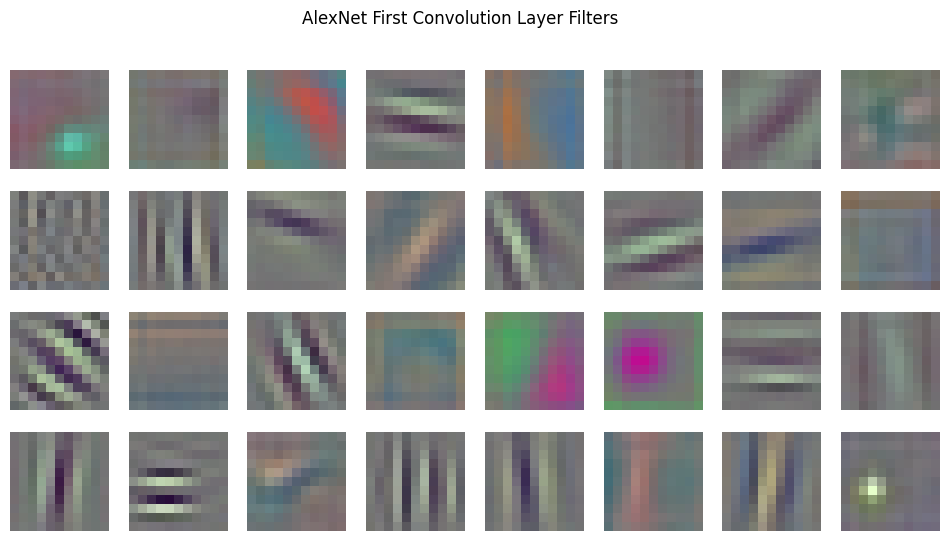

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
import torch
import torchvision.models as models
import matplotlib.pyplot as plt

# -----------------------------
# Load Pretrained AlexNet
# -----------------------------
model = models.alexnet(pretrained=True)
model.eval()

# First convolution layer
first_conv = model.features[0]

# -----------------------------
# 1. Visualize Filters
# -----------------------------
filters = first_conv.weight.data.clone()

# Normalize filters
filters = (filters - filters.min()) / (filters.max() - filters.min())

plt.figure(figsize=(12, 6))
for i in range(32):   # show first 32 filters
    plt.subplot(4, 8, i + 1)
    filt = filters[i].permute(1, 2, 0)
    plt.imshow(filt)
    plt.axis("off")

plt.suptitle("AlexNet First Convolution Layer Filters")
plt.show()

# -----------------------------
# Create Example Input Image
# -----------------------------
# Random image: (batch, channels, height, width)
input_image = torch.randn(1, 3, 224, 224)

# -----------------------------
# 2. Extract Feature Maps
# -----------------------------
with torch.no_grad():
    feature_maps = first_conv(input_image)

# -----------------------------
# Visualize Feature Maps
# -----------------------------
plt.figure(figsize=(12, 6))


**Question 9:** Train a GoogLeNet (Inception v1) or its variant using a standard dataset like CIFAR-10. Plot the training and validation accuracy over epochs and analyze overfitting or underfitting.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# -----------------------------
# Load CIFAR-10 dataset
# -----------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

NUM_CLASSES = 10

# -----------------------------
# Preprocess Data
# -----------------------------
x_train = tf.image.resize(x_train, (75, 75)) / 255.0
x_test  = tf.image.resize(x_test, (75, 75)) / 255.0

y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test  = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

# -----------------------------
# Load Inception Model
# -----------------------------
base_model = InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=(75, 75, 3)
)

base_model.trainable = False

# -----------------------------
# Build Model
# -----------------------------
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers


**Question 10:**  You are working in a healthcare AI startup. Your team is tasked with developing a system that automatically classifies medical X-ray images into normal, pneumonia, and COVID-19. Due to limited labeled data, what approach would you suggest using among CNN architectures discussed (e.g., transfer learning with ResNet or Inception variants)? Justify your approach and outline a deployment strategy for production use.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Simulate small dataset
# -----------------------------
NUM_CLASSES = 3
IMG_SIZE = (224, 224)
BATCH_SIZE = 8

# Random "images" for demo purposes
x_train = np.random.rand(50, IMG_SIZE[0], IMG_SIZE[1], 3).astype(np.float32)
y_train = tf.keras.utils.to_categorical(np.random.randint(0, NUM_CLASSES, 50), NUM_CLASSES)

x_val = np.random.rand(10, IMG_SIZE[0], IMG_SIZE[1], 3).astype(np.float32)
y_val = tf.keras.utils.to_categorical(np.random.randint(0, NUM_CLASSES, 10), NUM_CLASSES)

# -----------------------------
# Load Pre-trained ResNet50
# -----------------------------
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze base layers

# -----------------------------
# Add Custom Classifier
# -----------------------------
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)

# -----------------------------
# Compile Model
# -----------------------------
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# -----------------------------
# Train Model (Feature Extraction)
# -----------------------------
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=5,
                    batch_size=BATCH_SIZE)

# -----------------------------
# Plot Accuracy Curves
# -----------------------------
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# -----------------------------
# Grad-CAM Visualization
# -----------------------------
def grad_cam(model, img, layer_name='conv5_block3_out'):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

# Pick one example image from validation
example_img = x_val[0][np.newaxis, ...]
heatmap = grad_cam(model, example_img)

# Overlay heatmap
plt.imshow(example_img[0])
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.title("Grad-CAM Overlay")
plt.axis('off')
plt.show()
